This module is for indicating weight decay to prevent overfitting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

Formula for weight decay is J(w) = MSE + lambda * wT * w

Weight update function is w <- w-n(dJ(w)/dw)

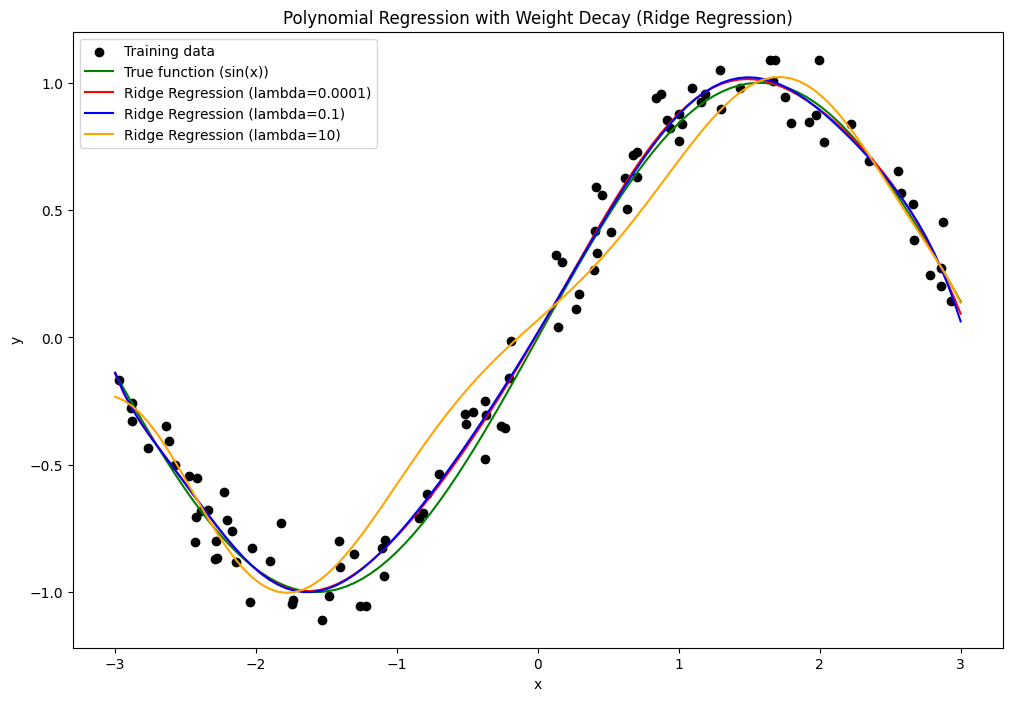

In [8]:
np.random.seed(0)
X_train = np.random.uniform(-3,3,size=100).reshape(-1,1)
y_train = np.sin(X_train) + np.random.normal(0,0.1,size=X_train.shape).reshape(-1,1)

X_plot = np.linspace(-3,3,100).reshape(-1,1)
y_plot = np.sin(X_plot)

degree = 10
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_plot_poly = poly.transform(X_plot)

### Define lambdas for weight decay
lambdas = [1e-4, 1e-1, 10] # Small, medium, large weight decay
colors = ['red', 'blue', 'orange']

plt.figure(figsize=(12,8))
plt.scatter(X_train, y_train, color='black', label='Training data')
plt.plot(X_plot, y_plot, color='green', label='True function (sin(x))')

for lam,c in zip(lambdas, colors):
    model = Ridge(alpha=lam) ### Ridge regression with weight decay
    model.fit(X_train_poly, y_train)
    y_plot_pred = model.predict(X_plot_poly)
    plt.plot(X_plot, y_plot_pred, label=f'Ridge Regression (lambda={lam})', color=c)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression with Weight Decay (Ridge Regression)')
plt.show() 